![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Sentiment Classification

### Dataset
- Dataset of 50,000 movie reviews from IMDB, labeled by sentiment positive (1) or negative (0)
- Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers).
- For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".
- As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.

Command to import data
- `from tensorflow.keras.datasets import imdb`

### Import the data (2 Marks)
- Use `imdb.load_data()` method
- Get train and test set
- Take 10000 most frequent words

In [32]:
# importing the librabries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Flatten, Dense, TimeDistributed

In [3]:
# loading the data, train and test set for the 10000 most frequent words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
# checking the shape of the dataset
print("Shape of train features -", train_data.shape)
print("Shape of test features -", test_data.shape)
print("Shape of train labels -", train_labels.shape)
print("Shape of test labels -", test_labels.shape)

Shape of train features - (25000,)
Shape of test features - (25000,)
Shape of train labels - (25000,)
Shape of test labels - (25000,)


In [5]:
# Checking the length of each review for
data = np.concatenate((train_data, test_data), axis=0)
targets = np.concatenate((train_labels, test_labels), axis=0)

In [6]:
# length of words in each review combining the train and test data
length = [len(i) for i in data]
print(length)

[218, 189, 141, 550, 147, 43, 123, 562, 233, 130, 450, 99, 117, 238, 109, 129, 163, 752, 212, 177, 129, 140, 256, 888, 93, 142, 220, 193, 171, 221, 174, 647, 233, 162, 597, 234, 51, 336, 139, 231, 704, 142, 861, 132, 122, 570, 55, 214, 103, 186, 113, 169, 469, 138, 302, 766, 351, 146, 59, 206, 107, 152, 186, 431, 147, 684, 383, 324, 252, 263, 787, 211, 314, 118, 390, 132, 710, 306, 167, 115, 95, 158, 156, 82, 502, 314, 190, 174, 60, 145, 214, 659, 408, 515, 461, 202, 238, 170, 107, 171, 158, 145, 790, 258, 287, 67, 123, 975, 775, 236, 195, 274, 214, 91, 1038, 815, 183, 206, 50, 118, 147, 141, 60, 56, 439, 439, 213, 144, 533, 303, 203, 563, 129, 153, 55, 92, 174, 187, 183, 165, 78, 198, 156, 223, 127, 61, 362, 84, 57, 176, 159, 57, 159, 165, 213, 194, 149, 130, 203, 19, 98, 466, 525, 130, 322, 153, 408, 215, 472, 143, 136, 354, 260, 319, 125, 209, 282, 810, 142, 240, 148, 198, 193, 123, 128, 103, 479, 345, 263, 165, 205, 333, 184, 92, 177, 335, 120, 121, 259, 180, 160, 114, 59, 343, 513

In [7]:
print("Average length of words for the reviews:", np.mean(length))

Average length of words for the reviews: 234.75892


### Pad each sentence to be of same length (2 Marks)
- Take maximum sequence length as 300

In [8]:
train_data = sequence.pad_sequences(train_data, maxlen=300)
test_data = sequence.pad_sequences(test_data, maxlen=300)

### Print shape of features & labels (2 Marks)

Number of review, number of words in each review

In [9]:
# checking the shape of features & labels
print("Shape of train features -", train_data.shape)
print("Shape of test features -", test_data.shape)
print("Shape of train labels -", train_labels.shape)
print("Shape of test labels -", test_labels.shape)

Shape of train features - (25000, 300)
Shape of test features - (25000, 300)
Shape of train labels - (25000,)
Shape of test labels - (25000,)


In [10]:
# length of words in each review in train data
length_train_data = [len(i) for i in train_data]
print(length_train_data)

[300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300,

In [11]:
# number of unique words in the train data
len(np.unique(np.hstack(train_data)))

9999

In [12]:
# length of words in each review in test data
length_test_data = [len(i) for i in test_data]
print(length_test_data)

[300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300,

In [13]:
# number of unique words in the test data
len(np.unique(np.hstack(test_data)))

9943

Number of labels

In [14]:
# number of unique labels
len(np.unique(test_labels))

2

In [15]:
print("Labels for the dataset - ", np.unique(test_labels))

Labels for the dataset -  [0 1]


### Print value of any one feature and it's label (2 Marks)

Feature value

In [16]:
# printing one feature
print(train_data[9])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    1   14   20   47  111  439 3445   19   12   15  166   12
  216  125   40    6  364  352  707 1187   39  294   11   22  396   13
   28 

Label value

In [17]:
# printing one label
print(train_labels[9])

0


### Decode the feature value to get original sentence (2 Marks)

First, retrieve a dictionary that contains mapping of words to their index in the IMDB dataset

In [18]:
# getting the dictionary for the mappings
index = imdb.get_word_index()
index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

Now use the dictionary to get the original words from the encodings, for a particular sentence

In [19]:
# decoding the feature
for encoding in train_data[9]:
  for key, value in index.items():
    if encoding == value:
      print(key, end = " ")

the as on there plot she's iii film that for find that saw better just is along wrong silly awesome or play this you doing was one in own that successful are make and old plot gets unfortunately of on was although except value omar that with her do they gets for that with timing really way that is played character i i what poor set but is along 100 studio on film is missing br received fact to is mercifully br fabulous and them powers is tapes br enjoys indicate good women show to one good played i i was plain film because avoid for of totally it time do period it couple in college in viewers get br of my to of material it yet br out more 

Get the sentiment for the above sentence
- positive (1)
- negative (0)

In [20]:
if train_labels[9] == 1:
  print("Review is positive")
else: 
  print("Review is negative")

Review is negative


### Define model (10 Marks)
- Define a Sequential Model
- Add Embedding layer
  - Embedding layer turns positive integers into dense vectors of fixed size
  - `tensorflow.keras` embedding layer doesn't require us to onehot encode our words, instead we have to give each word a unique integer number as an id. For the imdb dataset we've loaded this has already been done, but if this wasn't the case we could use sklearn LabelEncoder.
  - Size of the vocabulary will be 10000
  - Give dimension of the dense embedding as 100
  - Length of input sequences should be 300
- Add LSTM layer
  - Pass value in `return_sequences` as True
- Add a `TimeDistributed` layer with 100 Dense neurons
- Add Flatten layer
- Add Dense layer

In [38]:
# defining the sequential model
tf.keras.backend.clear_session()  # For easy reset of notebook state.
model = Sequential()

# adding Embedding layer
model.add(Embedding(input_dim = 10000, output_dim = 100, input_length = 300))

# adding the LSTM layer
model.add(LSTM(64, activation = 'relu', return_sequences=True))

# adding TimeDistributed layer
model.add(TimeDistributed(Dense(100)))

# adding Flatten Layer
model.add(Flatten())

# adding Dense Layer
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))

# adding the output layer
model.add(Dense(1, activation='sigmoid'))

### Compile the model (2 Marks)
- Use Optimizer as Adam
- Use Binary Crossentropy as loss
- Use Accuracy as metrics

In [39]:
# compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Print model summary (2 Marks)

In [40]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 100)          1000000   
_________________________________________________________________
lstm (LSTM)                  (None, 300, 64)           42240     
_________________________________________________________________
time_distributed (TimeDistri (None, 300, 100)          6500      
_________________________________________________________________
flatten (Flatten)            (None, 30000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              30721024  
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               1

### Fit the model (2 Marks)

In [41]:
# fitting model
hist = model.fit(train_data, train_labels, validation_data=(test_data, test_labels), epochs=50, batch_size=128)

Train on 25000 samples, validate on 25000 samples
Epoch 1/50
25000/25000 [==============================] - 119s 5ms/sample - loss: 0.3944 - acc: 0.7959 - val_loss: 0.2879 - val_acc: 0.8776
Epoch 2/50
25000/25000 [==============================] - 120s 5ms/sample - loss: 0.1949 - acc: 0.9256 - val_loss: 0.2955 - val_acc: 0.8790
Epoch 3/50
25000/25000 [==============================] - 117s 5ms/sample - loss: 0.1064 - acc: 0.9628 - val_loss: 0.4134 - val_acc: 0.8580
Epoch 4/50
25000/25000 [==============================] - 116s 5ms/sample - loss: 0.0447 - acc: 0.9848 - val_loss: 0.6665 - val_acc: 0.8601
Epoch 5/50
25000/25000 [==============================] - 116s 5ms/sample - loss: 0.0251 - acc: 0.9909 - val_loss: 0.7778 - val_acc: 0.8540
Epoch 6/50
25000/25000 [==============================] - 117s 5ms/sample - loss: 0.0207 - acc: 0.9928 - val_loss: 0.9046 - val_acc: 0.8545
Epoch 7/50
25000/25000 [==============================] - 117s 5ms/sample - loss: 0.0108 - acc: 0.9964 - val_l

### Evaluate model (2 Marks)

Best Validation Loss:  0.28790020877838135 
Best Validation Accuracy:  0.8790000081062317


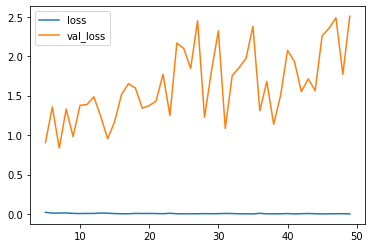

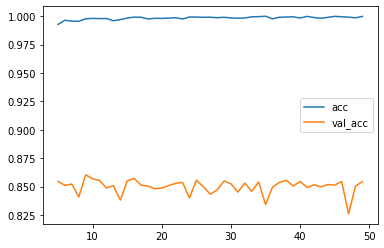

In [47]:
import pandas as pd
history_df = pd.DataFrame(hist.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['acc', 'val_acc']].plot()

print("Best Validation Loss: ", history_df['val_loss'].min() ,"\nBest Validation Accuracy: " ,history_df['val_acc'].max())


In [53]:
accuracy_score = model.evaluate(test_data, test_labels)
print("Loss:" , accuracy_score[0] ," Accuracy:",accuracy_score[1])

25000/25000 [==============================] - 33s 1ms/sample - loss: 2.5065 - acc: 0.8543
Loss: 2.5064816293904184  Accuracy: 0.85428


In [ ]:
# Clearly visible from the graph the difference in the train and test accuracy. We are getting a overfit model.
# To tune the model we can add more layers, including the dropout, normalization, averaging. 
# Also can add more features and check

### Predict on one sample (2 Marks)

In [54]:
# predicting for the feature 
test_data[25]

array([  14,   22,    9,    2,   38,  364,   23,  899,   54,   45,  427,
        285,   25,  100,  126,  181,   11,    6,  189,   22,   14,    9,
          4, 4963,    7,  112,    6,  189,   22,   13, 1133,  546,    8,
         30,    6,  194,  189,  337,    5,   13,  215,  135,   15,   14,
        313, 1545,    4, 6610,  313,    7, 5911,    9,    4,   65,    7,
          6,  604,    7, 1170,  362,   23,   68,   96,    8,    6, 2319,
        500,  937, 1197,    8, 1250,   46,   18,    4,  314,    5,   28,
          6,  521,   11,   19,    6,  719, 9752,  725, 7672,    4,  375,
       1972,   36,   97,    6, 2943, 3808,    5, 1197,    8,  140,   83,
        513,   18,    6, 1912,  519,  173,    4,  513,    9,  948,    5,
        146,   43, 2146,  570,   50,   88, 1584,   54,    4,  371, 2943,
       5553,  778, 1684,   72,   54,   13,  135,   48,  129,  267,   18,
          6,  189,   22,  140,   67,   14,   25,   80,  119,   12,   45,
       1669, 9589,    5, 4412,   19,   45,  880,  1

In [56]:
# decoding the feature
for encoding in test_data[43]:
  for key, value in index.items():
    if encoding == value:
      print(key, end = " ")

the was least as frustrating on most was rather is completely br and integral to br be help of etc and integral this only middle and song be where this as you episodes basically in be and to of and hers for than and in made i i movie of little chuckles was station of on with up been out upon it's is everything in can is starts shows of their with has is sky br emotions simon to of manages br impossible and in ridiculously of sky to beyond of considering in batman more with ruth brought to was looking of stop with 40 in practically of their in of self i i they of here br of you was with believed in eventually of you it of wasn't von br surrounded confusing for incident this and politically and to be admit feels than embarrassing york pride writes like sensual of and br plot got next to optimistic in of and br of sky was looking of you it dean movie that data of tension has of knives to and br of member building 

In [58]:
# label for this feature
if test_labels[25] == 1:
    print("Positive")
else:
    print("Negative")

Positive


In [63]:
# predicting all the features
predictions = model.predict(test_data)

# rounding to check the labels for positive or negative
predictions = [int(round(x[0])) for x in predictions]
print(predictions)

[0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 

In [64]:
# checking for the predicted value for this feature
if predictions[25] == 1:
    print("Positive")
else:
    print("Negative")

Positive
